In [1]:
import tensorflow as tf

In [2]:
string = tf.Variable("This is a string",tf.string)
number = tf.Variable(435,tf.int16)
floating = tf.Variable(45.98,tf.float64)


Another word form rank is degree and these terms simply indicate the dimensions of the tensor.

Above we have simply created a tensor of higher rank 0 or in facT a SCALAR

In [3]:
rank1_tensor = tf.Variable(['tim','martha','john'],tf.string)
rank2_tensor = tf.Variable([['hello', 'brian'],['good morning','brian']],tf.string)

In [4]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

#### Shape of a Tensor`

Amount of shapes that exist in each dimension.

It is highly imperitive to know that the number of elements in each dimension must be the same or tensorflow will generate an error.

In [5]:
tf.shape(rank1_tensor)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([3])>

In [6]:
tf.shape(rank2_tensor)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

### Reshaping Data
As long as the shape is valid we can change the shape of a tensor using the reshape method

In [7]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1,[2,3,1])
tensor3 = tf.reshape(tensor1,[3,-1]) #the -1 indicates that given the value 3, tensor flow will assume the other value to 
# to complete the dimensions. so Tensor flow assumed that the answer would be 2 because the dimension was 6

In [8]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


The product of the nubers in the dimensions gives the total number of elements in the tensor

There are different types of tensors
    ->Variable,
    ->Constant,
    ->Placeholder,
    ->Sparse Tensor,

With the exception of variable, all the remaining are immutable. i.e their value will not change during execution

### Evaluating Tensors

Sometimes we have to use the values of tensors to move forward. As tensors represent a apartially run computation, we have to a 'Session' to evaluate them.

with tf.Session() as sess: #creates a session using a default graph
    tensor.eval() #tensor will ofcourse be the name of our tensor

## Tensorflow core ML models
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models


(0.0, 6.0, 0.0, 20.0)

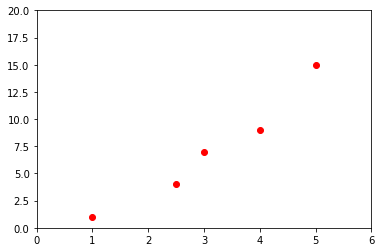

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2.5,3,4,5]
y = [1,4,7,9,15]

plt.plot(x,y,'ro')
plt.axis([0,6,0,20]) # x-ais goes from 0 to 6 and y axis goes from 0 to 20


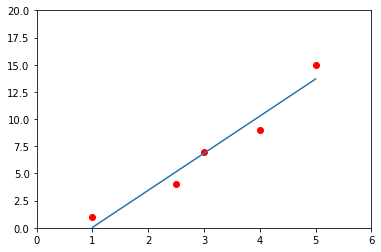

In [10]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

To better undderstand it, in scatter plots we must add a line of best fit to see the relationship between its variables

Points to keep in mind while analysing a line of best fit

- The line should ideally split the points equally on the both sides of the line
- and all the points must lie close to the line

If the above points are satisfied, it is a good line of fit

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [12]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training dataset
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing dataset. This will be used to test the model
print(dftrain.head())
y_train = dftrain.pop('survived') 
#the survived column gets popped and stored in the variable y_train. We do this because the label needs to be separated.
y_eval = dfeval.pop('survived')


   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


From seeing the excel sheet. we can see that we can form some form of correlation between the label, which in this case is "no. of people who survived", and other parameters effecting it. And considering the dataset on our hands we can form something of a linear relationship between each other


In [13]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [14]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [15]:
#if we want to print a specific row we do this. This is a very helpful command
print(dftrain.loc[0],y_train.loc[0]) #this corresponds to the first row

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [16]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [17]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [18]:
dftrain.describe(include='all')

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
count,627,627.000000,627.000000,627.000000,627.000000,627,627,627,627
unique,2,NaN,NaN,NaN,NaN,3,8,4,2
top,male,NaN,NaN,NaN,NaN,Third,unknown,Southampton,y
freq,410,NaN,NaN,NaN,NaN,341,481,450,372
mean,NaN,29.631308,0.545455,0.379585,34.385399,NaN,NaN,NaN,NaN
std,NaN,12.511818,1.151090,0.792999,54.597730,NaN,NaN,NaN,NaN
min,NaN,0.750000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,23.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN,NaN
50%,NaN,28.000000,0.000000,0.000000,15.045800,NaN,NaN,NaN,NaN
75%,NaN,35.000000,1.000000,0.000000,31.387500,NaN,NaN,NaN,NaN


In [19]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

We need to plot some graphs and realize some form of a relationship or correlation between the label and the factors affecting it

<AxesSubplot:>

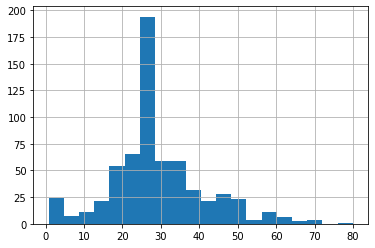

In [20]:
dftrain.age.hist(bins=20) #histogram of ages

Most passengers that survived are in their 20s and 30s

<AxesSubplot:>

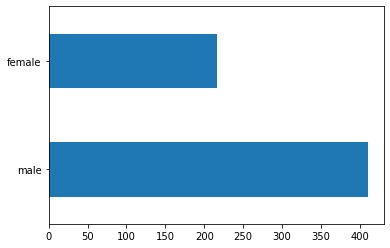

In [21]:
dftrain.sex.value_counts().plot(kind='barh') #bar graph of the no. of males and females

most of the passengers are male

<AxesSubplot:>

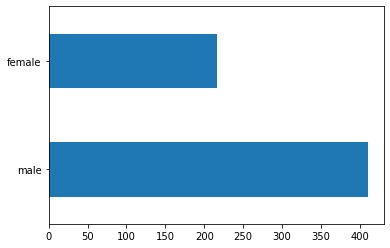

In [22]:
dftrain['sex'].value_counts().plot(kind='barh')

<AxesSubplot:>

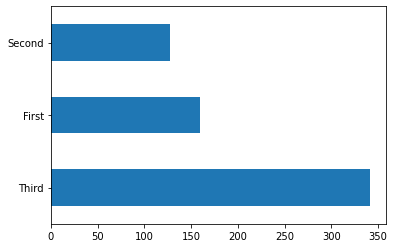

In [23]:
#this is a better manner to access the data
dftrain['class'].value_counts().plot(kind='barh')

In [24]:
dff=pd.concat([dftrain,y_train],axis=1).groupby('sex')
dff.head()
#as we can see, 'sex' becomes the defining column, i.e it becomes the first column
#that people see and understand that the divisions are made by giving 'sex', the priority

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
5,male,2.0,3,1,21.0750,Third,unknown,Southampton,n,0
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n,1
7,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n,1
9,male,20.0,0,0,8.0500,Third,unknown,Southampton,y,0
10,male,39.0,1,5,31.2750,Third,unknown,Southampton,n,0


Text(0.5, 0, '% survived')

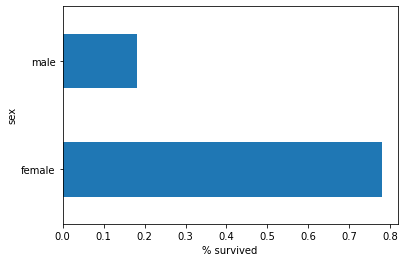

In [25]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

the sex that hs survived the most is FEMALE

After analyzing this information, we should notice the following:

>Most passengers are in their 20's or 30's

>Most passengers are male

>Most passengers are in "Third" class

>Females have a much higher chance of survival

Feature Columns
In our dataset we have two different kinds of information: Categorical and Numeric

Our categorical data is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2). THIS IS ONE-HOT-ENCODING

Fortunately for us TensorFlow has some tools to help!



In [26]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

#for creating a linear estimator, we create the following empty list
feature_columns = []


In [27]:
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets all the unique values from a particular categorical variable column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

A form of a numpy array is created and where feature's different categorical variable values are stored

Essentially what we are doing here is creating a list of features that are used in our dataset.

The cryptic lines of code inside the append() create an object that our model can use to map string values like "male" and "female" to integers. This allows us to avoid manually having to encode our dataframes.

#### The Training Process
So, we are almost done preparing our dataset and I feel as though it's a good time to explain how our model is trained. Specifically, how input data is fed to our model.

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of epochs.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function.

The input function simply defines how our dataset will be converted into batches at each epoch.

In [28]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use


#Hence as we can see we created the following input functions. One for training and one for evaluation.
train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


### WE NOW FINALLY CREATE THE MODEL
we are going to use a linear estimator to utilize the linear regression algorithm.

In [29]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

#We pass in the feature_columns to the LinearClassifier object of the estimator module in tensorflow

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mehra\\AppData\\Local\\Temp\\tmp11u8b1do', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### TRAINING THE MODEL

In [30]:
linear_est.train(train_input_fn) #train. we pass the training dataset.
result = linear_est.evaluate(eval_input_fn) #evaluate the model and store the results. But we past the testing dataset

clear_output() #clear console output
#print(result['accuracy'])
print(result)



{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.82359964, 'auc_precision_recall': 0.777725, 'average_loss': 0.51154065, 'label/mean': 0.375, 'loss': 0.5020303, 'precision': 0.7407407, 'prediction/mean': 0.30023888, 'recall': 0.6060606, 'global_step': 200}


Hence we get dictionary of a lot of things. but the one that we focus most is accuracy

In [31]:
print(result['accuracy'])

0.77272725


So we can see that the model has an accuracy of 75.75% 
And we now we have a model with a 74% accuracy (this will change each time)! Not crazy impressive but decent for our first try.

Now let's see how we can actually use this model to make predicitons.

We can use the .predict() method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

As you can see the survival rate is not very high :/

In [32]:
result = list(linear_est.predict(eval_input_fn))
print(result[0]['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mehra\AppData\Local\Temp\tmp11u8b1do\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0.9425772  0.05742283]


In [33]:
#this shows the probability of the third person's chances of survival
print(dfeval.loc[3])
print(result[3]['probabilities'][0]) #this is the probability of not surviving 
print(result[3]['probabilities'][1]) #this is the probability of surviving

#Did they actually survive or not is given by
print('The code of surviving is '+ str(y_eval.loc[3]))

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
0.4812519
0.5187481
The code of surviving is 1


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mehra\AppData\Local\Temp\tmp11u8b1do\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

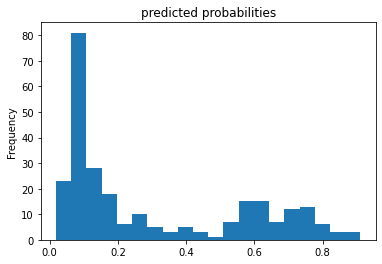

In [34]:
#we can even plot the predictions 
predicted_dictionaries = list(linear_est.predict(eval_input_fn))
#print(predicted_dictionaries)
probability = pd.Series(pred['probabilities'][1] for pred in predicted_dictionaries) 
#the above code converts the probablities  into a pandas series. The 'predicted_dictionaries' gives a lot of predicted parameters.
#We choose the dictionary key, 'probabilities' (which is a tuple) and from this tuple we extract the 2nd element which is the probability of survival
probability.plot(kind='hist',bins=20,title='predicted probabilities')




### CLASSIFICATION MODEL

Now that we've covered linear regression it is time to talk about classification. Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

So in this case we are going to be calculating probabilities of lying in a particular class for a particular data point

THERE ARE MANY CLASSIFICATION MODELS.

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

##### Dataset
This specific dataset seperates flowers into 3 different classes of species.

>Setosa

>Versicolor

>Virginica

The information about each flower is the following.

> sepal length

> sepal width

> petal length

> petal width

In [42]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on


In [43]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [44]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [46]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [48]:
train.shape


(120, 4)

In [49]:
#We have to create ann input function
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [52]:
train.keys() #this gives the column headings
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#### Building the Model
And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.

DNNClassifier (Deep Neural Network)

LinearClassifier

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.



In [53]:
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[30,10],n_classes=3)

#there are 30 nodes in the first hidden layer adn 10 hidden nodes in the second hidden layer
#and since we already know that there are 3 classes Setosa, Versicolor and Virginica, we put n_classes =3



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mehra\\AppData\\Local\\Temp\\tmp05ki1w5w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


What we've just done is created a deep neural network that has two hidden layers. These layers have 30 and 10 neurons respectively. This is the number of neurons the TensorFlow official tutorial uses so we'll stick with it. However, it is worth mentioning that the number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values. Try playing around with the number of hidden neurons and see if your results change.

#### TRAINING THE MODEL


In [56]:
classifier.train(input_fn=lambda:input_fn(train,train_y,training=True),steps=5000)

#lambda is added to avoid creating an inner function previously
"""
Here lambda is 1 line function. So what is defined after ':', is what the function actually does

x = lambda: print('hi)
x()

the output will be 'hi'
"""
#we are running 5000 steps. More steps is not always good

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mehra\AppData\Local\Temp\tmp05ki1w5w\model.ckpt-5000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\mehra\AppData\Local\Temp\tmp05ki1w5w\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...
INFO:tensorflow:loss = 0.37012815, step = 5000
INFO:tensorflow:global_step/sec: 296.916
INFO:tensorflow:loss = 0.36869738, step = 5100 (0.345 sec)
INFO:tensorflow:global_step/sec: 361.279
INFO:tensorflow:loss = 0.37497061, step = 5200 (0.271 sec)
INFO:tensorflow:global_step/sec: 375.616
INFO:tensorflow:loss = 0.36098075, step

"\nHere lambda is 1 line function. So what is defined after ':', is what the function actually does\n"

In [55]:
eval_result = classifier.evaluate(input_fn=lambda:input_fn(test,test_y,training=False)) 
#since it is testing, I don't have to train it
#We did not specify the steps because the model will only looka t the testing dataset once, unlike the training dataset which needs to be run multiple times
print('\nTEST SET ACCURACY: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-21T21:01:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mehra\AppData\Local\Temp\tmp05ki1w5w\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.54260s
INFO:tensorflow:Finished evaluation at 2022-04-21-21:01:18
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss = 0.4379735, global_step = 5000, loss = 0.4379735
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\mehra\AppData\Local\Temp\tmp05ki1w5w\model.ckpt-5000

TEST SET ACCURACY: 0.900



#### Predictions from the classification

In [60]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

#We are essentially creating a function which will predict the probability of the flower lying in every category 
#given the features the user has entered

print('Please type the numeric values as prompted ')
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")

        if not val.isdigit(): #The isdigit() method returns True if all the characters are digits, otherwise False.
            valid=False
    predict[feature] = [float(val)] #since the input is a string, it is converted to float

predictions = classifier.predict(input_fn=lambda:input_fn(predict))

for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))





Please type the numeric values as prompted 
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mehra\AppData\Local\Temp\tmp05ki1w5w\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (40.1%)
